In [ ]:
!pip install msprime

     |████████████████████████████████| 5.7MB 16.3MB/s 
     |████████████████████████████████| 921kB 37.5MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 552kB 41.1MB/s 
ERROR: nbclient 0.5.3 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [ ]:
import msprime
import pandas as pd
import numpy as np
import torch
from IPython.display import SVG, display

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Generating data

In [ ]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=5_000)
demography.add_population(name="B", initial_size=5_000)
demography.add_population(name="C", initial_size=1_000)
demography.add_population_split(time=2000, derived=["A", "B"], ancestral="C")

PopulationSplit(time=2000, derived=['A', 'B'], ancestral='C')

In [ ]:
#rate = demography.migration_matrix[0, 1]
#demography.set_symmetric_migration_rate(demography, rate )

In [ ]:
n_samples = 10
ts = msprime.sim_ancestry({"A": n_samples, "B": n_samples}, demography=demography, sequence_length=1000, random_seed=49)
mts = msprime.sim_mutations(ts, rate=1e-4, random_seed=49)
SVG(mts.draw_svg())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gmatrix = np.array([])

flag = 0
for i in range(500):
    mts = msprime.sim_mutations(ts, rate=1e-4)
    for variant in mts.variants():
        gmatrix = np.append(gmatrix, np.expand_dims(variant.genotypes, axis=0), axis=0) if flag else np.expand_dims(variant.genotypes, axis=0)
        flag = 1
        break

print(f"Shape of genotypes: {gmatrix.shape}")
print(f"Genotypes [:10]:\n {gmatrix[:10]}")

Shape of genotypes: (500, 40)
Genotypes [:10]:
 [[0 3 3 0 0 0 0 0 0 3 3 1 0 0 0 0 0 0 3 0 0 0 1 0 0 1 0 0 0 0 2 3 0 2 0 0
  0 1 0 0]
 [1 2 2 0 0 2 0 1 2 1 1 2 0 1 0 0 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 2 1 1 0 0 1 1 0 2 0 0 0 2
  2 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0
  0 2 0 0]
 [0 0 0 0 0 0 0 0 3 2 0 0 0 0 2 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 1 1 1 1 3 1 1 1 2 3 2 1 1 1 1 1 1 1 1 3 1 0 1 3 0 0 1 1 3 0 1 1 0 1 1
  1 0 1 3]
 [0 0 0 1 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 0 0 0 2
  2 3 0 0]
 [2 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [3 0 0 0 1 0 2 0 1 1 1 0 0 1 1 1 1 1 0 1 3 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
  0 0 0 0]
 [2 0 1 0 0 0 1 2 0 2 2 0 1 2 0 0 0 0 1 2 0 1 0 1 1 0 0 1 0 1 0 2 1 0 1 1
  1 0 1 1]]


In [ ]:
gmatrix = (gmatrix > 0).astype(int)
gmatrix

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 0]])

In [ ]:
print(f"Number of individuals: {len(gmatrix)}")
population_labels = np.tile([0] * (n_samples * 2) + [1] * (n_samples * 2), (len(gmatrix) // (n_samples * 2)) + 1)[:len(gmatrix)]
print(f"Number of targets: {len(population_labels)}")
population_labels
# 0 - "A", 1 - "B"

Number of individuals: 500
Number of targets: 500


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Preprocessing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gmatrix, population_labels, test_size=0.2, random_state=48)
print(f"Train data shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train data shape: (400, 40)
Train labels shape: (400,)
Test data shape: (100, 40)
Test labels shape: (100,)


In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### FC Neural Network

In [ ]:
class GenNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(GenNet, self).__init__()

    self.fc1 = torch.nn.Linear(n_samples * 4, n_hidden_neurons)
    self.act1 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
    self.act3 = torch.nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    x = self.act3(x)
    return x

In [ ]:
model = GenNet(10)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss = torch.nn.BCELoss()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#### Train loop #1

In [ ]:
batch_size = 10
accuracies = []

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    batch_indexes = order[start_index : start_index + batch_size]

    x_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = model.forward(x_batch)
    
    loss_value = loss(preds, y_batch.reshape(-1, 1).type(torch.FloatTensor).to(device))
    loss_value.backward()

    optimizer.step()

  if epoch % 500 == 0:
      test_preds = torch.round(model.forward(X_test))
      test_acc = (test_preds == y_test).float().mean()
      train_acc = (torch.round(model.forward(X_train))== y_train).float().mean()
      print(f'Train loss: {loss_value}, Test loss: {loss(model.forward(X_test), y_test.reshape(-1, 1).type(torch.FloatTensor).to(device))}')
      print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc}\n')
      accuracies.append(test_acc)

Train loss: 0.7075328826904297, Test loss: 0.7010105848312378
Train accuracy: 0.5311999917030334, Test accuracy: 0.4717999994754791

Train loss: 0.003825817257165909, Test loss: 8.790228843688965
Train accuracy: 0.5016250014305115, Test accuracy: 0.5029999613761902

Train loss: 0.2417691946029663, Test loss: 14.980441093444824
Train accuracy: 0.5016250014305115, Test accuracy: 0.5005999803543091

Train loss: 0.0023326126392930746, Test loss: 15.841376304626465
Train accuracy: 0.5016250014305115, Test accuracy: 0.5011999607086182

Train loss: 0.119736447930336, Test loss: 16.25401496887207
Train accuracy: 0.5016250014305115, Test accuracy: 0.5

Train loss: 0.00013963754463475198, Test loss: 17.352617263793945
Train accuracy: 0.5016250014305115, Test accuracy: 0.5

Train loss: 0.00017016311176121235, Test loss: 18.236879348754883
Train accuracy: 0.5016250014305115, Test accuracy: 0.5011999607086182

Train loss: 7.289901259355247e-05, Test loss: 18.473514556884766
Train accuracy: 0.501625

#### Train loop #2

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)


train_dataloader = DataLoader(train_dataset, batch_size=16)
test_dataloader = DataLoader(val_dataset, batch_size=16)

In [ ]:
losses = []
accur = []
for i in range(1000):
  for j, (X_train, y_train) in enumerate(train_dataloader):
    
    #calculate output
    output = model.forward(X_train)
 
    #calculate loss
    loss_value = loss(output, y_train.reshape(-1,1).type(torch.FloatTensor).to(device))
 
    #accuracy
    predicted = model.forward(torch.tensor(X_train, dtype=torch.float32))
    acc = torch.mean((torch.round(predicted) == y_train).type(torch.FloatTensor))

    #backprop
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

  if i % 100 == 0:
    losses.append(loss_value)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i, loss_value, acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


epoch 0	loss : 0.061713237315416336	 accuracy : 0.546875
epoch 100	loss : 0.061362624168395996	 accuracy : 0.546875
epoch 200	loss : 0.061360713094472885	 accuracy : 0.546875
epoch 300	loss : 0.06136542186141014	 accuracy : 0.546875
epoch 400	loss : 0.06137596815824509	 accuracy : 0.546875
epoch 500	loss : 0.06137584149837494	 accuracy : 0.546875
epoch 600	loss : 0.061375148594379425	 accuracy : 0.546875
epoch 700	loss : 0.06137413531541824	 accuracy : 0.546875
epoch 800	loss : 0.061373498290777206	 accuracy : 0.546875
epoch 900	loss : 0.06137334927916527	 accuracy : 0.546875


### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gmatrix, population_labels, test_size=0.33, random_state=48)
print(f"Train data shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train data shape: (335, 40)
Train labels shape: (335,)
Test data shape: (165, 40)
Test labels shape: (165,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=48)

In [ ]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rfc, gmatrix, population_labels, train_sizes=[0.1, 0.3, 0.5, 1], cv=3,
                                                                        scoring='accuracy')

In [ ]:
print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[ 33  99 166 333]
[1.         0.95959596 0.94176707 0.87087087]
[0.523904   0.52798018 0.53796022 0.54796431]


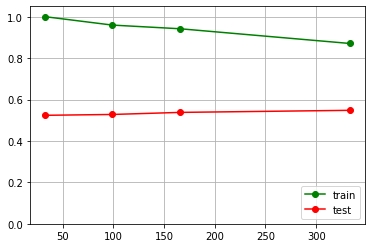

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
plt.show()

### Gradient Boosting

In [ ]:
import xgboost as xgb

In [ ]:
n_trees = [1] + list(range(10, 500, 5)) 
n_trees

[1,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495]

In [ ]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=n_tree, min_child_weight=3)  # GBM
    score = model_selection.cross_val_score(estimator, gmatrix, population_labels, 
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 45.9 s, sys: 720 ms, total: 46.6 s
Wall time: 47 s


In [ ]:
xgb_scoring

matrix([[0.49700599, 0.51497006, 0.45783133],
        [0.49700599, 0.53293413, 0.47590361],
        [0.49700599, 0.53293413, 0.47590361],
        [0.49101796, 0.53293413, 0.44578313],
        [0.48502994, 0.55688623, 0.44578313],
        [0.47904192, 0.54491018, 0.43975904],
        [0.46706587, 0.54491018, 0.44578313],
        [0.47305389, 0.53892216, 0.43975904],
        [0.47305389, 0.53892216, 0.46385542],
        [0.47904192, 0.52694611, 0.47590361],
        [0.47904192, 0.52694611, 0.46385542],
        [0.49700599, 0.53293413, 0.46987952],
        [0.49700599, 0.53293413, 0.4939759 ],
        [0.49700599, 0.53892216, 0.48795181],
        [0.50299401, 0.5508982 , 0.4939759 ],
        [0.50299401, 0.5508982 , 0.4939759 ],
        [0.50299401, 0.5508982 , 0.5       ],
        [0.50898204, 0.56287425, 0.5060241 ],
        [0.52095808, 0.55688623, 0.51204819],
        [0.52095808, 0.56287425, 0.51204819],
        [0.52694611, 0.56287425, 0.51204819],
        [0.51497006, 0.5508982 , 0

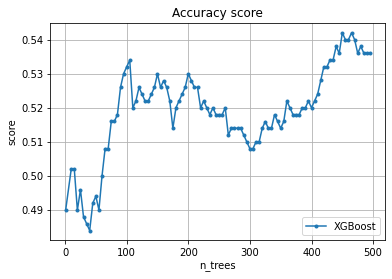

In [ ]:
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')
plt.show()